In [1]:
# !pip install plotly

# Visualización de la Información
## TAREA-08  Análisis del calentamiento global
**Actividades resultas por: Andrés Urbano Guillermo Gerardo**

**Introducción**

El calentamiento global ha llegado a ser un tema importante en los últimos años. El debate sobre el calentamiento global también se ha extendido por todo el mundo. La visualización de la temperatura en la Tierra ha llegado a ser uno de los argumentos más importantes en las conversaciones, por lo que es hora de "trazar" algunos datos.

**Desarrollo**

En esta tarea utilice el código siguiente para analizar las temperaturas promedio en los países. Conforme vaya obteniendo las gráficas mostradas, realice las siguientes actividades solicitadas.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import seaborn as sns
import time
import warnings
warnings.filterwarnings('ignore')

In [3]:
global_temp_country = pd.read_csv('data/Temperatures.csv')

**Mapeo de temperaturas medias en los países**

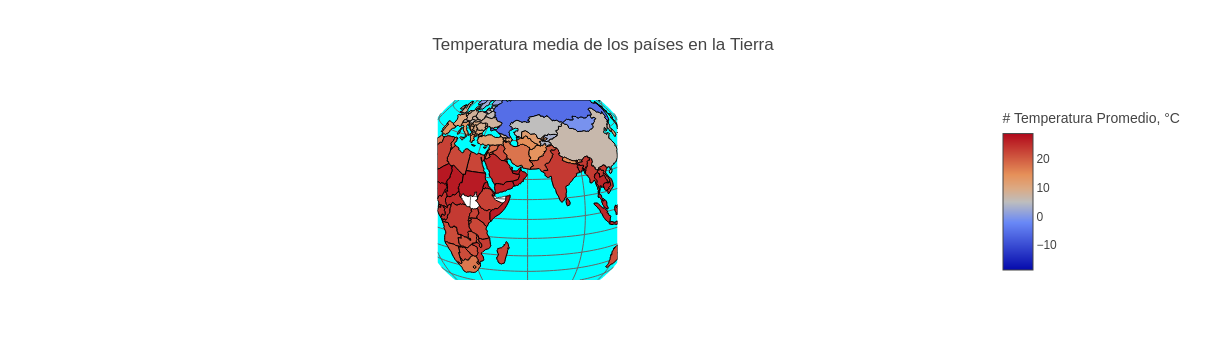

In [4]:
# Eliminemos los países duplicados (en el análisis no consideramos la presencia de
# colonias en estos países) y países para los que no hay información sobre la temperatura

global_temp_country_clear = global_temp_country[~global_temp_country['Country'].isin(
    ['Denmark', 'Antarctica', 'France', 'Europe', 'Netherlands',
     'United Kingdom', 'Africa', 'South America'])]

global_temp_country_clear = global_temp_country_clear.replace(
   ['Denmark (Europe)', 'France (Europe)', 'Netherlands (Europe)', 'United Kingdom (Europe)'],
   ['Denmark', 'France', 'Netherlands', 'United Kingdom'])

# Temperatura promedio para cada país
countries = np.unique(global_temp_country_clear['Country'])
mean_temp = []
for country in countries:
    mean_temp.append(global_temp_country_clear[global_temp_country_clear['Country'] == 
                                               country]['AverageTemperature'].mean())


data = [ dict(
        type = 'choropleth',
        locations = countries,
        z = mean_temp,
        locationmode = 'country names',
        text = countries,
        marker = dict(
            line = dict(color = 'rgb(0,0,0)', width = 1)),
            colorbar = dict(autotick = True, tickprefix = '', 
            title = '# Temperatura\nPromedio,\n°C')
            )
        ]

layout = dict(
    title = 'Temperatura media de los países en la Tierra',
    geo = dict(
        showframe = False,
        showocean = True,
        oceancolor = 'rgb(0,255,255)', #color del oceano
        projection = dict(
        type = 'orthographic',
            rotation = dict(
                    lon = 60,  #Longitud
                    lat = 10), #Latitud
        ),
        lonaxis =  dict(
                showgrid = True,
                gridcolor = 'rgb(102, 102, 102)' #color del eje de Longitud
            ),
        lataxis = dict(
                showgrid = True,
                gridcolor = 'rgb(102, 102, 102)' #color del eje de Latitud
                )
              ),
        )

fig = dict(data=data, layout=layout)
py.iplot(fig, validate=False, filename='worldmap')

# ACTIVIDAD 1

- De acuerdo con la gráfica anterior, y una visualización preliminar, mencione algunos ejemplos de países que tengan temperaturas promedio bajas (como Canadá).

Otros paises con temparaturas bajas serian Greenland, Iceland, Russia, Norway, Sweden, Finland, Mongilia y Kyrgyzstan.

- ¿Dónde es la temperatura más baja? (es claramente visible en el mapa).

La termperatura más baja es Groenlandia (Greenland)

- De acuerdo con esta visualización preliminar ¿Dónde es el país más cálido?

El pais más calido seria Argentina con una temperatura de 14 grados.


# ACTIVIDAD 2
- Ordene los países por temperatura promedio y trace una gráfica de barras horizontal

**Leamos los datos del archivo "GlobalTemperatures.csv", que tiene la temperatura mensual de la Tierra, y grafiquémosla**.

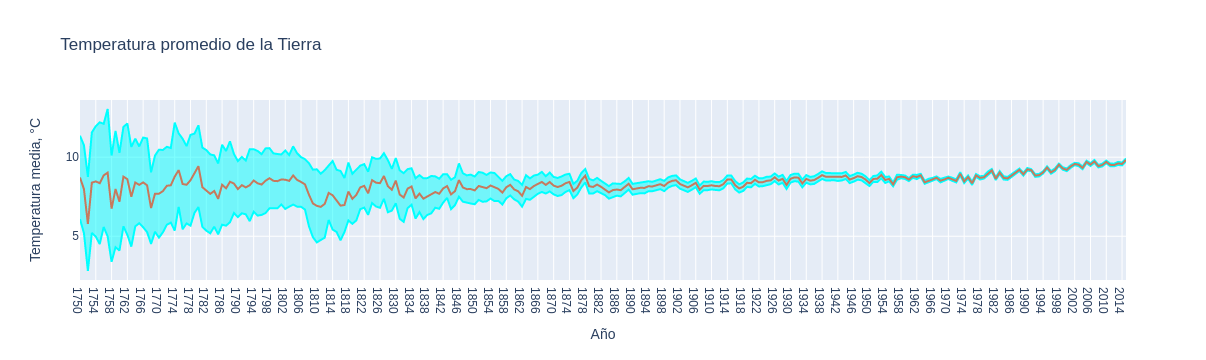

In [6]:
global_temp = pd.read_csv('data/GlobalTemperatures.csv')

# Extraer el año de una fecha
years = np.unique(global_temp['dt'].apply(lambda x: x[:4]))
mean_temp_world = []
mean_temp_world_uncertainty = []

for year in years:
    mean_temp_world.append(global_temp[global_temp['dt'].apply(
        lambda x: x[:4]) == year]['LandAverageTemperature'].mean())
    mean_temp_world_uncertainty.append(global_temp[global_temp['dt'].apply(
                lambda x: x[:4]) == year]['LandAverageTemperatureUncertainty'].mean())

trace0 = go.Scatter(
    x = years, 
    y = np.array(mean_temp_world) + np.array(mean_temp_world_uncertainty),
    fill= None,
    mode='lines',
    name='max',
    line=dict(
        color='rgb(0, 255, 255)',
    )
)
trace1 = go.Scatter(
    x = years, 
    y = np.array(mean_temp_world) - np.array(mean_temp_world_uncertainty),
    fill='tonexty',
    mode='lines',
    name='min',
    line=dict(
        color='rgb(0, 255, 255)',
    )
)

trace2 = go.Scatter(
    x = years, 
    y = mean_temp_world,
    name='Temperatura media',
    line=dict(
        color='rgb(199, 121, 093)',
    )
)
data = [trace0, trace1, trace2]

layout = go.Layout(
    xaxis=dict(title='Año'),
    yaxis=dict(title='Temperatura media, °C'),
    title='Temperatura promedio de la Tierra',
    showlegend = False)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

# ACTIVIDAD 3
- De acuerdo a los gráficos ¿Se puede considerar que hay calentamiento global en los últimos años? Describa brevemente. 

Vemos en la gráfica que la temperatura promedia va aumentando hasta alcanzar los 10 grados en el 2014. Al principio el promedio de la temperatura fluctuaba con subidas y bajadas muy pronunciadas, pero conforme pasa los años estas subidas y bajas dejaron de pronunciarse.

- ¿A partir de qué fecha, la superficie terrestre empieza a tener los valores más altos de temperatura?. 

Vemos que en los últimos años el dataset empiezan a llegar a 10 grados, esto son desde el 2002 al 2014.

**Veamos el gráfico de cambios de temperatura anuales en ciertos continentes (supongamos que tomamos en consideración un país por continente)**.

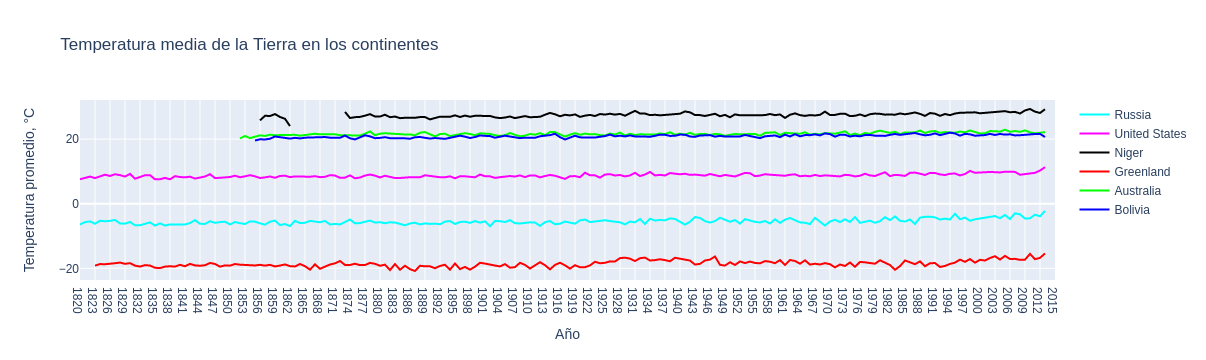

In [7]:
continent = ['Russia', 'United States', 'Niger', 'Greenland', 'Australia', 'Bolivia']
mean_temp_year_country = [ [0] * len(years[70:]) for i in range(len(continent))]
j = 0
for country in continent:
    all_temp_country = global_temp_country_clear[global_temp_country_clear['Country'] == country]
    i = 0
    for year in years[70:]:
        mean_temp_year_country[j][i] = all_temp_country[all_temp_country['dt'].apply(
                lambda x: x[:4]) == year]['AverageTemperature'].mean()
        i +=1
    j += 1

traces = []
colors = ['rgb(0, 255, 255)', 'rgb(255, 0, 255)', 'rgb(0, 0, 0)',
          'rgb(255, 0, 0)', 'rgb(0, 255, 0)', 'rgb(0, 0, 255)']
for i in range(len(continent)):
    traces.append(go.Scatter(
        x=years[70:],
        y=mean_temp_year_country[i],
        mode='lines',
        name=continent[i],
        line=dict(color=colors[i]),
    ))

layout = go.Layout(
    xaxis=dict(title='Año'),
    yaxis=dict(title='Temperatura promedio, °C'),
    title='Temperatura media de la Tierra en los continentes',)

fig = go.Figure(data=traces, layout=layout)
py.iplot(fig)

# ACTIVIDAD 4
- ¿A partir de qué año se puede considerar que ha habido un aumento continuo en la temperatura media anual de los países ("continentes") que tomamos en consideración?

Para Greenland tenemos que hubo un aumento en el año de 1946, en Russia no hay picos tan pronunciados, pero en el año de 1967 empieza a verse un aumento en la temperatura, en United States se encuentran varios picos muy pequeños en diferentes años, en Bolivia podemos ver un aumento en el año de 1913, para Australia sigue muy parecido a las temperaturas de Bolivia, por ultima en Niger existen varios picos en diferentes años que son 1913, 1931, 1970 y 2009.



- ¿A qué se deberá la interrupción (discontinuidad) de los valores de temperatura en el gráfico?

Puede ser que para ese rango de fechas no hubo un registro de las temperaturas promedio de ese pais.

# ACTIVIDAD 5

Elabore un breve resúmen de las actividades realizadas y describa una **conclusión** considerando los siguientes aspectos:
- Tendencia global (aumento o disminución, según lo considere) de la temperatura en los últimos años.

Pudimos observar que la temperatura promedio anual en los diferentes años sigue un crecimiento lineal, pero con un incremente pequeño, vemos que al inicio de 1750 las temperatura fluctuaban con grandes subidas y bajadas hasta 1900 donde estas fluctuaciones dejaron de ser tan pronunciados, despues de esos años el aumento de temperatura subia y bajaban con pequeñas cantidades con una tendencia positiva.

- Los factores que piensa que influyen en esta tendencia global.

Los factores que influyen a esta tendencia podria haber sido el surgimiento del transistor y por ende todo los aparatos electricos para las industrias, vemos que al inicio de 1970 el planeta tenia una temperatura de 7 grados, pero en la decada del siglo veinti uno el aumento de la temperatura fue creciando poco a poco.

- Si considera que la tendencia global va en **aumento**, mencione las posibles soluciones.

Las posibles soluciones podria ser reducir el número de gases invernadero que generan las industrias, evitar desechos toxicos en los basureros, utilizar otros medios de transporte más ecologicos como por ejemplo con energias renovables, utilizar la bicleta como medio de transporte para trayectorias cercanas.

- Si considera que la tendencia global va a la **baja**, describa ampliamente las causas que provocan ello. 

Las causas podria ser que las personas hemos generado menos gases invernadero y por ende hemos preferido utilizar energias renovables, hemos evitado de usar petrolio como medio de energia, tambien se ha incentivado a las personas el uso del recliclado y el ahorro de energia. 